In [1]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from model import *

unlabel_prob = 0.9 # probability of labels to be unlabeled

sigma = 3          # sigma hyperparameter for RBF kernel

%matplotlib inline

### Cora Multiclass Data

In [2]:
true_labels, features, graph = Data.Data.load_cora(multiclass=True)
_, is_labeled, labeled_indices, unlabeled_indices = utils.random_unlabel(true_labels,unlabel_prob=unlabel_prob)
solution  = true_labels[unlabeled_indices]
weights   = utils.rbf_kernel(features,s=sigma,G=graph)

In [12]:
def _tnorm(weights):
    '''
    Column normalize -> row normalize weights.
    '''
    # column normalize weights
    T = weights / np.sum(weights, axis=0, keepdims=True)
    # row normalize T
    Tnorm = T / np.sum(T, axis=1, keepdims=True)
    return Tnorm


def closed(labels,
                 weights,
                 labeled_indices,
                 unlabeled_indices):
    '''
    Closed solution of label propagation.
    '''
    # normalize T
    Tnorm = _tnorm(weights)
    # sort Tnorm by unlabeled/labeld
    Tuu_norm = Tnorm[np.ix_(unlabeled_indices,unlabeled_indices)]
    Tul_norm = Tnorm[np.ix_(unlabeled_indices,labeled_indices)]
    # closed form prediction for unlabeled nodes
    lapliacian = (np.identity(len(Tuu_norm))-Tuu_norm)
    propagated = Tul_norm @ labels[labeled_indices]
    label_predictions = np.linalg.solve(lapliacian, propagated)
    return label_predictions

def iter_multiclass(X, # input labels
                          weights,
                          labeled_indices,
                          unlabeled_indices,
                          num_iter=-1):
    preds = []
    num_classes = len(set(X))
    for class_ in range(num_classes):
        X_class = X.copy()
        X_class[labeled_indices] = X_class[labeled_indices] == class_
        X_class[unlabeled_indices] = np.array([1/num_classes] * len(unlabeled_indices))
        if num_iter == -1:
            pred = closed(X_class,weights,labeled_indices,unlabeled_indices)
        else:
            pred = iter(X_class,weights,labeled_indices,unlabeled_indices,num_iter)
        preds.append(pred)
    res = np.vstack(preds).T
    return res

In [13]:
    def iter(X, # input labels
                   weights,
                   labeled_indices,
                   unlabeled_indices,
                   num_iter):
        '''
        Iterated solution of label propagation.
        '''
        # normalize T
        Tnorm = _tnorm(weights)
        h = X.copy()

        for i in range(num_iter):
            # propagate labels
            h = np.dot(Tnorm,h)
            # don't update labeled nodes
            h[labeled_indices] = X[labeled_indices]

        # only return label predictions
        return(h[unlabeled_indices])

In [14]:
a=iter_multiclass(true_labels, # input labels
                          weights,
                          labeled_indices,
                          unlabeled_indices,
                          num_iter=1)

In [15]:
np.sum(a,axis=1)

array([ 0.55970098,  0.        ,  0.25338898, ...,  0.09634915,
        0.        ,  0.        ])

### Cora Data

### Data Preparation

In [6]:
LX, Ly, UX, _, Uy_sol = random_unlabel(data,labels,label_prob=label_prob,hard=hard)
features = np.vstack((LX,UX))
if iris:
    weights = rbf_kernel(features,s=sigma,percentile=percentile)
if cora:
    weights = rbf_kernel(features,G=graph)

true_labels   = np.hstack((Ly,Uy_sol))
num_features  = features.shape[1]
num_labeled   = len(Ly)
num_unlabeled = len(Uy_sol)
num_nodes     = num_labeled+num_unlabeled
num_classes   = len(set(Ly))
if iris:
    graph = (weights > 0).astype(int)

In [ ]:
def iter_multiclass(W,Ly,iter_,num_classes):
    for class_ in num_classes:
        Ly
    

In [8]:
lp = LP(num_nodes,num_labeled)

In [9]:
iter_ = 1000
preds = []
for class_ in range(num_classes):
    Ly_class = Ly == class_
    Uy_class = [1/num_classes] * num_unlabeled
    pred     = lp.closed(weights,Ly_class)
    #     pred     = lp.closed(weights,Ly_class,Uy_class,iter_)
    preds.append(pred)
res = np.vstack(preds).T

In [82]:
(res == res.max(axis=1, keepdims=1)).astype(float)

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [11]:
np.sum(res,axis=1)[:200]

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  0.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  0.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.  

In [23]:
def to_one_hot(vec,num_samples, num_classes):
    res = np.zeros((num_samples, num_classes))
    res[np.arange(num_samples), vec.astype(int)] = 1
    return res

In [41]:
Ly_onehot     = to_one_hot(Ly,num_labeled,num_classes)
Uy_sol_onehot = to_one_hot(Uy_sol,num_unlabeled,num_classes)
Uy_onehot     = Uy_sol_onehot.copy()
Uy_onehot.fill(1/num_classes)

In [ ]:
lp = LP(num_nodes,num_labeled)
Uy_lp = np.rint(lp.closed(weights,Ly))
Uy_lp_iter = np.rint(lp.iter_(weights,Ly,Uy,100))

In [6]:
unlabeled_test = np.hstack((np.zeros(LY.shape[0]),np.ones((Uy.shape[0])))).reshape(1,num_nodes)
test_data = {
    'X': np.hstack((Ly,Uy)).reshape(1,num_nodes),
    'y': np.tile(true_labels,(Ly.shape[0],1))[1:2],
    'unlabeled': unlabeled_test,
    'labeled': (1 - unlabeled_test).reshape(1,num_nodes),
    'true_labeled': true_labeled,
    'masked':masked_[0:1]
}

In [7]:
unlabeled_ = np.hstack((np.identity(LY.shape[0]),np.ones((Ly.shape[0],Uy.shape[0]))))
data = {
    'X':np.hstack((LY, UY)),
    'y':np.reshape(true_labels,(1,len(true_labels))),
    'unlabeled':unlabeled_,
    'labeled':1-unlabeled_,
    'true_labeled': true_labeled,
    'masked':masked_
}

## Sparse

In [61]:
dlp = DeepLP_RBF(100, num_nodes, features, graph, sigma, lr=0.01)

In [62]:
pred_dlp = dlp.labelprop(test_data)
Uy_dlp = np.rint(pred_dlp[:,num_labeled:]).reshape(num_unlabeled)
print("Accuracy:", accuracy(Uy_sol,Uy_dlp))
print("RMSE:", rmse(Uy_sol,Uy_dlp))
print("Objective:", objective(Ly,Uy_dlp,dlp.get_val(dlp.W)))

Accuracy: 0.554147936248
RMSE: 0.512872905599
Objective: 1452.45400041


In [63]:
# dlp.train(data,test_data,100)

In [109]:
dlp = DeepLP_RBF_Sparse(100, num_nodes, features, graph, sigma, lr=0.1)


In [105]:
dlp = DeepLP_WeightedRBF_Sparse(100, num_nodes, features, graph, sigma, theta, lr=1, regularize=0.00001)

In [106]:
pred_dlp_s = dlp.labelprop(test_data)
Uy_dlp_s = np.rint(pred_dlp_s[:,num_labeled:]).reshape(num_unlabeled)
print("Accuracy:", accuracy(Uy_sol,Uy_dlp_s))
print("RMSE:", rmse(Uy_sol,Uy_dlp_s))
# print("Objective:", objective(Ly,Uy_dlp_s,dlp.get_val(dlp.W)))

Accuracy: 0.510522213562
RMSE: 0.51948558067


In [110]:
dlp.train(data,test_data,1000)

epoch: -1 labeled loss: 0.466236 unlabeled loss: 0.401394 accuracy: 0.535302 sol unlabeled loss: 0.400906 sol accuracy: 0.510522
--- 69.32573080062866 seconds ---
epoch: 0 labeled loss: 0.465645 unlabeled loss: 0.40085 accuracy: 0.536722 sol unlabeled loss: 0.400366 sol accuracy: 0.511691
--- 5.113013982772827 seconds ---
sigma: 3.1
epoch: 10 labeled loss: 0.462895 unlabeled loss: 0.398389 accuracy: 0.535521 sol unlabeled loss: 0.397924 sol accuracy: 0.510132
--- 28.509160041809082 seconds ---
sigma: 4.0087
epoch: 20 labeled loss: 0.462144 unlabeled loss: 0.39777 accuracy: 0.535209 sol unlabeled loss: 0.397309 sol accuracy: 0.509743
--- 28.928560972213745 seconds ---
sigma: 4.67688
epoch: 30 labeled loss: 0.461848 unlabeled loss: 0.397542 accuracy: 0.53422 sol unlabeled loss: 0.397083 sol accuracy: 0.508963
--- 28.331184148788452 seconds ---
sigma: 5.14372
epoch: 40 labeled loss: 0.461697 unlabeled loss: 0.39743 accuracy: 0.534007 sol unlabeled loss: 0.396974 sol accuracy: 0.508574
---

KeyboardInterrupt: 

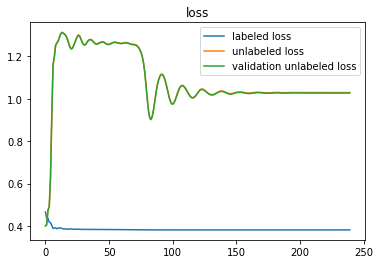

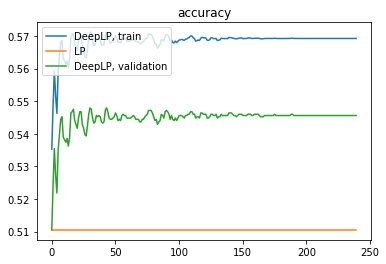

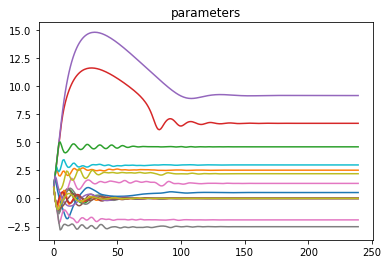

In [108]:
dlp.plot()

# Label Propagation

In [19]:
lp = LP(num_nodes,num_labeled)
Uy_lp = np.rint(lp.closed(weights,Ly))
Uy_lp_iter = np.rint(lp.iter_(weights,Ly,Uy,100))

In [20]:
print("[Accuracy] Closed solution:", accuracy(Uy_sol, Uy_lp), " Iter Solution:", accuracy(Uy_sol, Uy_lp_iter))
print("[RMSE] Closed solution", rmse(Uy_sol, Uy_lp), " Iter solution", rmse(Uy_sol, Uy_lp))

[Accuracy] Closed solution: 0.494736842105  Iter Solution: 0.494736842105
[RMSE] Closed solution 0.505263157895  Iter solution 0.505263157895


In [14]:
np.sum(Uy_lp_iter==2)

57

In [15]:
T = weights / np.sum(weights, axis=1, keepdims=True)
Tnorm = T / np.sum(T, axis=0, keepdims=True)

In [16]:
np.sum(T[0])

1.0

In [25]:
# for iter_ in [1,2,3,4,5,10,100,1000]:
#     print(iter_)
#     Uy_lp_iter = np.rint(lp.iter_(weights,Ly,Uy,iter_))
#     print("Objective:", objective(Ly,np.rint(Uy_lp_iter),weights))
#     print("Accuracy:", accuracy(Uy_sol,Uy_lp_iter))
#     print("RMSE:", rmse(Uy_sol,Uy_lp_iter))

In [8]:
dlp = DeepLP_RBF_Sparse(100, num_nodes, features, graph, sigma, lr=0.01)

Tensor("truediv_3:0", shape=(), dtype=float32) 0.01


In [9]:
dlp.loss

<tf.Tensor 'truediv_3:0' shape=() dtype=float32>

# DeepLP

In [26]:
def dense_to_sparse(a_t):
    idx = tf.where(tf.not_equal(a_t, 0))
    # Use tf.shape(a_t, out_type=tf.int64) instead of a_t.get_shape() if tensor shape is dynamic
    sparse = tf.SparseTensor(idx, tf.gather_nd(a_t, idx), a_t.get_shape())
    return sparse

def init_weights(phi, G, sigma):
    r = tf.reduce_sum(phi*phi, 1)
    r = tf.reshape(r, [-1, 1])
    D = tf.cast(r - 2*tf.matmul(phi, tf.transpose(phi)) + tf.transpose(r),tf.float32)
    W = tf.SparseTensor.__mul__(G,tf.exp(-tf.divide(D, sigma ** 2)))
    return W

In [27]:
phi         = tf.constant(features, dtype=tf.float32)
G           = dense_to_sparse(tf.constant(graph, dtype=tf.float32))
sigma  = tf.Variable(3.0, dtype=tf.float32)

In [28]:
shape             = [None, num_nodes]
X            = tf.placeholder("float", shape=shape)
y            = tf.placeholder("float", shape=shape)
unlabeled    = tf.placeholder("float", shape=shape)
labeled      = tf.placeholder("float", shape=shape)
masked       = tf.placeholder("float", shape=shape)
true_labeled = tf.placeholder("float", shape=shape)

In [29]:
init_weights(phi, G, sigma)

In [24]:
W           = init_weights(phi, G, sigma)

In [25]:
W

In [12]:
T = W / tf.sparse_reduce_sum(W, axis = 0, keep_dims=True)
Tnorm = T / tf.sparse_reduce_sum(T, axis = 1, keep_dims=True)
trueX = X

In [13]:
for i in range(10):
    h = tf.transpose(tf.sparse_tensor_dense_matmul(
                    Tnorm,
                    X,
                    adjoint_a=True,
                    adjoint_b=True,
    ))
    h = tf.multiply(h, unlabeled) + tf.multiply(trueX, labeled)
    X = h
yhat = X

In [14]:
#     h = tf.transpose(tf.sparse_tensor_dense_matmul(
#                     Tnorm,
#                     X,
#                     adjoint_a=True,
#                     adjoint_b=True,
#                 ))
#     h = tf.multiply(h, unlabeled) + tf.multiply(trueX, labeled)

In [15]:

# T = W / tf.sparse_reduce_sum(W, axis = 0, keep_dims=True)
# Tnorm = T / tf.sparse_reduce_sum(T, axis = 1, keep_dims=True)

# trueX = X

# def layer(i,X,trueX,Tnorm):
#     h = tf.transpose(tf.sparse_tensor_dense_matmul(
#                     Tnorm,
#                     X,
#                     adjoint_a=True,
#                     adjoint_b=True,
#                 ))
#     h = tf.multiply(h, unlabeled) + tf.multiply(trueX, labeled)
#     return [i+1,h,trueX,Tnorm]

# def condition(i,X,trueX,Tnorm):
#     return 10 > i

# _,yhat,_,_ = tf.while_loop(condition, layer, loop_vars=[0,X,trueX,Tnorm])


In [16]:
def calc_loss(mask,y,yhat):
    loss_mat = tf.multiply(mask, (y-yhat) ** 2 )
    return tf.reduce_sum(loss_mat) / tf.count_nonzero(loss_mat,dtype=tf.float32)

In [17]:
a = calc_loss(masked,y,yhat)

In [29]:
updates = tf.train.AdamOptimizer(0.1).minimize(tf.reduce_sum(h))


In [30]:
init_g = tf.global_variables_initializer()
init_l = tf.local_variables_initializer()
with tf.Session() as sess:
    sess.run(init_g)
    sess.run(init_l)
    sess.run(updates,feed_dict={X:data['X'],
                                        y:data['y'],
                                        unlabeled:data['unlabeled'],
                                        labeled:data['labeled'],
                                        masked:data['masked'],
                                        true_labeled:data['true_labeled']})

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-27349f19316d>", line 2, in <module>
    X            = tf.placeholder("float", shape=shape)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1507, in placeholder
    name=name)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1997, in _placeholder
    name=name)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [28]:
data['y']

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [13]:
dlp = DeepLP(100, num_nodes, weights, 1, regularize=0, graph_sparse=True)

In [14]:
pred_dlp = dlp.labelprop(test_data)
Uy_dlp = np.rint(pred_dlp[:,num_labeled:]).reshape(num_unlabeled)

In [15]:
print("Accuracy:", accuracy(Uy_sol,Uy_dlp))
print("RMSE:", rmse(Uy_sol,Uy_dlp))
print("Objective:", objective(Ly,Uy_dlp,dlp.get_val(dlp.W)))

Accuracy: 0.448947778644
RMSE: 0.551052221356
Objective: 317.437880744


# DeepLP_RBF

In [11]:
dlp_rbf = DeepLP_RBF(1, num_nodes, features, graph, sigma, lr=0.01, graph_sparse=True )

In [ ]:
dlp_rbf.train(data,test_data,100)

epoch: -1 labeled loss: 0.765971 unlabeled loss: 0.783788 accuracy: 0.480956 sol unlabeled loss: 0.783763 sol accuracy: 0.452455
epoch: 0 labeled loss: 0.760723 unlabeled loss: 0.782018 accuracy: 0.485005 sol unlabeled loss: 0.782 sol accuracy: 0.456742
sigma: 4.12032


In [9]:
sigmas = np.arange(0.5,10,0.1)

In [10]:
len(sigmas)

95

In [11]:
accuracies=[]
rmses=[]
for i,sigma_ in enumerate(sorted(sigmas)):
    if i > 69:

        print(i)
        dlp = DeepLP_RBF_Sparse(100, num_nodes, features, graph, sigma_, lr=0.1)
        pred_dlp_s = dlp.labelprop(test_data)
        Uy_dlp_s = np.rint(pred_dlp_s[:,num_labeled:]).reshape(num_unlabeled)
        acc = accuracy(Uy_sol,Uy_dlp_s)
        rms = rmse(Uy_sol,Uy_dlp_s)
#         print("Accuracy:", )
#         print("RMSE:", )

        accuracies.append(acc)
        rmses.append(rms)


70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94


In [12]:
len(accuracies)

69

In [12]:
np.savetxt('accuracies2.csv',delimiter=',')

TypeError: savetxt() missing 1 required positional argument: 'X'

In [16]:
acc2 = np.loadtxt('accuracies2.csv', delimiter=',')

In [17]:
acc = np.loadtxt('accuracies.csv', delimiter=',')

In [18]:
rmse = np.savetxt('rmses.csv', rmses, delimiter=',')

In [19]:
rmse2 = np.savetxt('rmses2.csv', rmses, delimiter=',')